In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
df=pd.read_csv("C:/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [6]:
categorical_val = []
continous_val = []
for column in df.columns:
#     print('==============================')
#     print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [7]:
#Data Preprocessing
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
# How many missing zeros are mising in each feature
feature_columns = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'
]

for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(df.loc[df[column] == 0])}")

Pregnancies ==> Missing zeros : 111
Glucose ==> Missing zeros : 5
BloodPressure ==> Missing zeros : 35
SkinThickness ==> Missing zeros : 227
Insulin ==> Missing zeros : 374
BMI ==> Missing zeros : 11
DiabetesPedigreeFunction ==> Missing zeros : 0
Age ==> Missing zeros : 0


In [9]:
from sklearn.impute import SimpleImputer


fill_values = SimpleImputer(missing_values=0, strategy="mean", copy=False)
df[feature_columns] = fill_values.fit_transform(df[feature_columns])

for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(df.loc[df[column] == 0])}")

Pregnancies ==> Missing zeros : 0
Glucose ==> Missing zeros : 0
BloodPressure ==> Missing zeros : 0
SkinThickness ==> Missing zeros : 0
Insulin ==> Missing zeros : 0
BMI ==> Missing zeros : 0
DiabetesPedigreeFunction ==> Missing zeros : 0
Age ==> Missing zeros : 0


In [10]:
from sklearn.model_selection import train_test_split


X = df[feature_columns]
y = df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")


In [12]:
#SVM
# Create a SVM classifier with linear kernel
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1, random_state=42)

In [13]:
#BAGGING
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(base_estimator=svm, n_estimators=10, random_state=42)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[314  35]
 [ 84 104]]
ACCURACY SCORE:
0.7784
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.79   0.75      0.78       0.77          0.77
recall      0.90   0.55      0.78       0.73          0.78
f1-score    0.84   0.64      0.78       0.74          0.77
support   349.00 188.00      0.78     537.00        537.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[126  25]
 [ 33  47]]
ACCURACY SCORE:
0.7489
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.79  0.65      0.75       0.72          0.74
recall      0.83  0.59      0.75       0.71          0.75
f1-score    0.81  0.62      0.75       0.72          0.75
support   151.00 80.00      0.75     231.00        231.00


In [14]:
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
    },
}

In [15]:
scores

{'Bagging Classifier': {'Train': 0.7783985102420856,
  'Test': 0.7489177489177489}}

In [16]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(base_estimator=svm, n_estimators=30,algorithm='SAMME', random_state=42)

ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[310  39]
 [ 80 108]]
ACCURACY SCORE:
0.7784
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.79   0.73      0.78       0.76          0.77
recall      0.89   0.57      0.78       0.73          0.78
f1-score    0.84   0.64      0.78       0.74          0.77
support   349.00 188.00      0.78     537.00        537.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[123  28]
 [ 33  47]]
ACCURACY SCORE:
0.7359
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.79  0.63      0.74       0.71          0.73
recall      0.81  0.59      0.74       0.70          0.74
f1-score    0.80  0.61      0.74       0.70          0.73
support   151.00 80.00      0.74     231.00        231.00


In [17]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),
    }

In [18]:
scores['AdaBoost']

{'Train': 0.7783985102420856, 'Test': 0.7359307359307359}

In [24]:
from sklearn.model_selection import cross_val_score


score = cross_val_score(SVC(), X, y, cv=5)
score

array([0.77272727, 0.71428571, 0.75324675, 0.79084967, 0.78431373])

In [25]:
score.mean()

0.7630846277905101

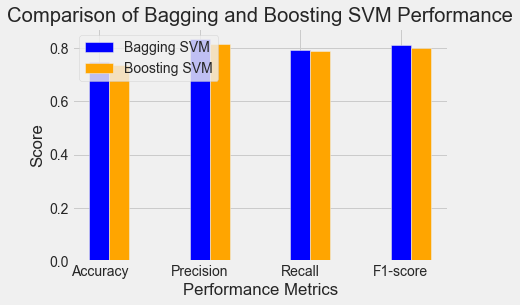

In [28]:
import matplotlib.pyplot as plt

# Defining the performance metrics for each model
bagging_metrics = [0.7489, 0.834, 0.792, 0.812]
boosting_metrics = [0.7359, 0.814, 0.788, 0.801]

# Defining the labels for the x-axis
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Setting the position of the bars on the x-axis
x = [i for i in range(len(labels))]

# Creating the bar chart
plt.bar(x, bagging_metrics, width=0.2, color='blue', align='center', label='Bagging SVM')
plt.bar([i + 0.2 for i in x], boosting_metrics, width=0.2, color='orange', align='center', label='Boosting SVM')

# Add the labels to the chart
plt.xlabel('Performance Metrics')
plt.ylabel('Score')
plt.xticks(x, labels)
plt.title('Comparison of Bagging and Boosting SVM Performance')

# Add a legend to the chart
plt.legend(loc='upper left')


# Show the chart
plt.show()


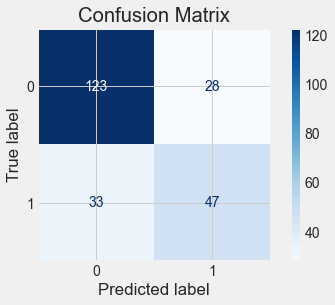

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(ada_boost_clf, X_test, y_test, cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")

plt.show()
